Pregnancies: Number of times the patient has been pregnant.
Glucose: Plasma glucose concentration measured two hours after a glucose tolerance test.
BloodPressure: Diastolic blood pressure (mm Hg).
SkinThickness: Triceps skinfold thickness (mm), often used to estimate body fat.
Insulin: Serum insulin levels (μU/mL), indicating insulin response.
BMI: Body Mass Index, calculated as weight in kg/(height in m)^2.
DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
Age: Age of the patient (years).
Outcome: Target variable indicating if the patient has diabetes (1 = diabetes, 0 = no diabetes).

## 1- clean and preprocess the dataset
## 2- train logistic regression model
## 3- evaluate the model using classifictio report
## 4- do hyperparameters tuning by grid search
## 5- evaluate the model again using classification report
## 6- draw the auc curve

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("datasets_228_482_diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df[df.duplicated()].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [8]:
import matplotlib.pyplot as plt

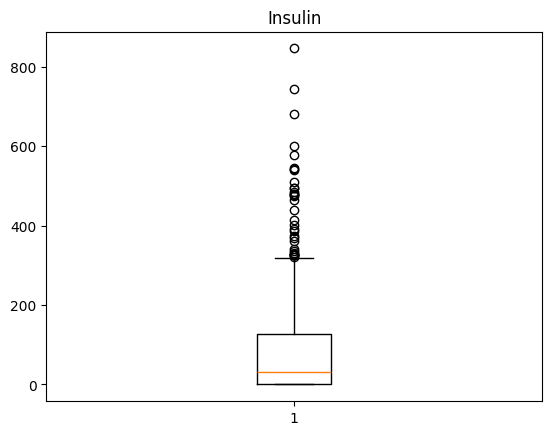

In [9]:
plt.boxplot(df["Insulin"])
plt.title("Insulin")
plt.show()

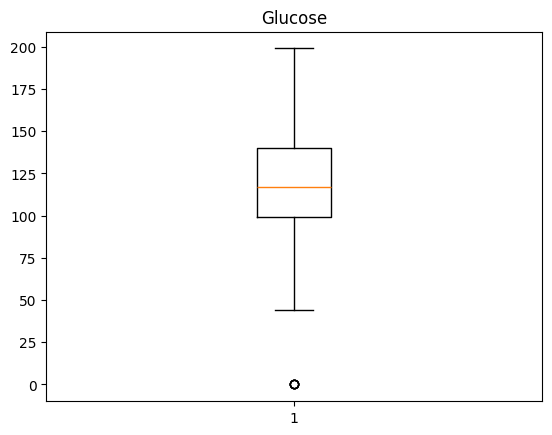

In [10]:
plt.boxplot(df["Glucose"])
plt.title("Glucose")
plt.show()

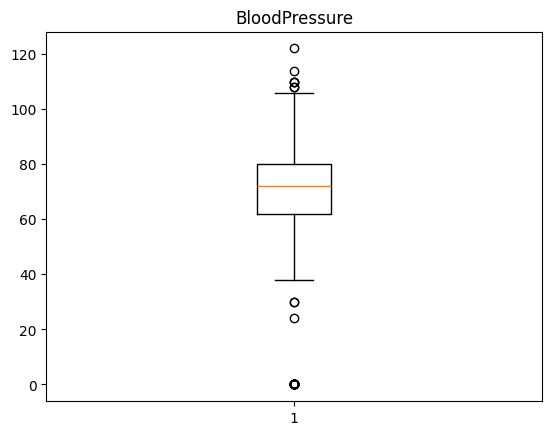

In [11]:
plt.boxplot(df["BloodPressure"])
plt.title("BloodPressure")
plt.show()

# Create a function that detect the outliers using IQR

In [12]:
def calculate_IQR(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    return IQR 

In [13]:
def lower_whisker(df, col, IQR_value):
    q1 = df[col].quantile(0.25)
    lower = q1 - 1.5 * IQR_value
    return lower

In [14]:
def upper_whisker(df, col, IQR_value):
    q3 = df[col].quantile(0.75)
    upper = q3 + 1.5 * IQR_value
    return upper

In [15]:
def detect_outliers(df, col):
    IQR_value = calculate_IQR(df, col)
    lower = lower_whisker(df, col, IQR_value)
    upper = upper_whisker(df, col, IQR_value)
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
outliers_df_Insulin = detect_outliers(df,col="Insulin")
outliers_df_Insulin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [18]:
outliers_df_Blood = detect_outliers(df,col="BloodPressure")
outliers_df_Blood

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0


In [19]:
outliers_df_BMI = detect_outliers(df,col="BMI")
outliers_df_BMI

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
145,0,102,75,23,0,0.0,0.572,21,0
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0


In [20]:
outliers_df_DiabetesPedigreeFunction = detect_outliers(df,col="DiabetesPedigreeFunction")
outliers_df_DiabetesPedigreeFunction

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [21]:
outliers_df_Age = detect_outliers(df,col="Age")
outliers_df_Age

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [22]:
major_class=df["Outcome"].mode()[0]
major_class

np.int64(0)

In [23]:
# There is an imbalance in the target column so class 0 is ttahe major and class 1 is the minor
# We will use SMOTE to balance the classes
#
df["Outcome"].value_counts() 

Outcome
0    500
1    268
Name: count, dtype: int64

In [24]:
# so I will select only the outliers in the major class 0 and drop it 


In [25]:
def outliers_in_major_class(df, target_col="Outcome"):
    major_class = df[target_col].mode()[0]
    
    outlier_indices = []  # Initialize a list to store the indices of the outliers
    
    # Iterate over numerical columns only
    for col in df.select_dtypes(include=['number']).columns:
        # Detect outliers for the current column
        outliers_df = detect_outliers(df, col)
        
        # Filter out the outliers that belong to the major class
        outliers_in_major_class = outliers_df[outliers_df[target_col] == major_class]
        
        # Append the indices of the outliers to the list
        outlier_indices.extend(outliers_in_major_class.index.tolist())  # Extend the list with outlier indices
    
    return outlier_indices

# Call the function and get the outlier indices
outliers_indices = outliers_in_major_class(df, target_col='Outcome')
print(outliers_indices)



[75, 182, 342, 7, 18, 49, 60, 81, 106, 172, 222, 336, 347, 362, 426, 430, 453, 494, 522, 533, 549, 589, 597, 601, 643, 697, 703, 54, 139, 153, 228, 247, 248, 258, 286, 392, 486, 519, 574, 645, 707, 710, 49, 60, 81, 145, 247, 371, 426, 494, 522, 673, 684, 12, 58, 147, 228, 330, 371, 383, 395, 534, 593, 621, 622, 123, 453, 459, 489, 537, 674, 684]


In [26]:
outliers_in_major_class=outliers_in_major_class(df,target_col='Outcome')
outliers_in_major_class

[75,
 182,
 342,
 7,
 18,
 49,
 60,
 81,
 106,
 172,
 222,
 336,
 347,
 362,
 426,
 430,
 453,
 494,
 522,
 533,
 549,
 589,
 597,
 601,
 643,
 697,
 703,
 54,
 139,
 153,
 228,
 247,
 248,
 258,
 286,
 392,
 486,
 519,
 574,
 645,
 707,
 710,
 49,
 60,
 81,
 145,
 247,
 371,
 426,
 494,
 522,
 673,
 684,
 12,
 58,
 147,
 228,
 330,
 371,
 383,
 395,
 534,
 593,
 621,
 622,
 123,
 453,
 459,
 489,
 537,
 674,
 684]

In [27]:
outliers_df = df.iloc[outliers_indices]
outliers_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
7,10,115,0,0,0,35.3,0.134,29,0
18,1,103,30,38,83,43.3,0.183,33,0
...,...,...,...,...,...,...,...,...,...
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
674,8,91,82,0,0,35.6,0.587,68,0


In [28]:
def drop_outliers_by_indices(df, outlier_indices):
    # Drop the rows with the given indices
    df_cleaned = df.drop(outlier_indices)
    return df_cleaned


In [29]:
df_cleaned = drop_outliers_by_indices(df, outliers_indices)
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
df_cleaned.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

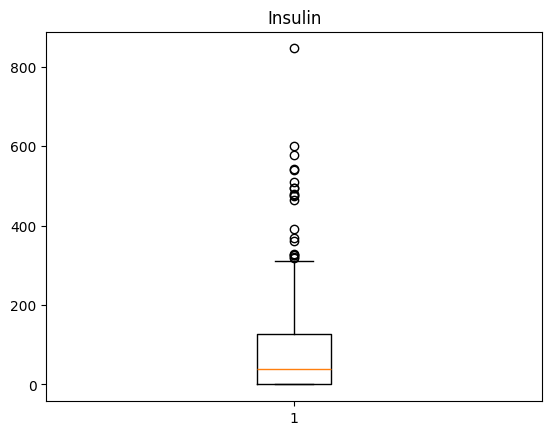

In [31]:
plt.boxplot(df_cleaned["Insulin"])
plt.title("Insulin")
plt.show()

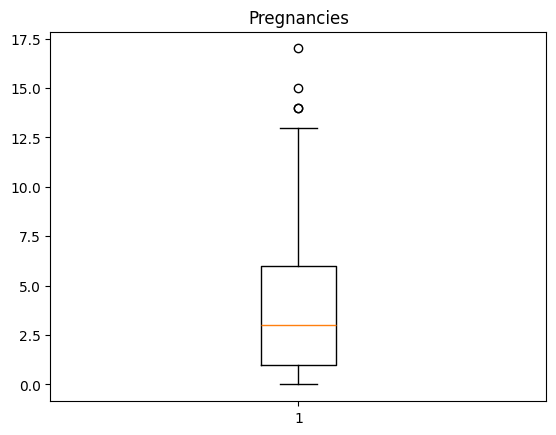

In [32]:
plt.boxplot(df_cleaned["Pregnancies"])
plt.title("Pregnancies")
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler

## split the data into X and y

In [34]:
df_cleaned.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
X = df_cleaned.drop("Outcome",axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [36]:
y = df_cleaned["Outcome"]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify=y)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((494, 8), (213, 8), (494,), (213,))

In [39]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
509,8,120,78,0,0,25.0,0.409,64
103,1,81,72,18,40,26.6,0.283,24
85,2,110,74,29,125,32.4,0.698,27
717,10,94,72,18,0,23.1,0.595,56


In [40]:
y_train.value_counts()

Outcome
0    307
1    187
Name: count, dtype: int64

## Apply MinMaxscaleing

In [40]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
print(X_test_scaled)

[[0.23529412 0.75879397 0.81818182 ... 0.44262295 0.09773756 0.30612245]
 [0.17647059 0.4120603  0.63636364 ... 0.31445604 0.14072398 0.08163265]
 [0.17647059 0.30653266 0.74545455 ... 0.51266766 0.07466063 0.51020408]
 ...
 [0.05882353 0.44221106 0.56363636 ... 0.44560358 0.15565611 0.04081633]
 [0.         0.65829146 0.         ... 0.6438152  0.08687783 0.10204082]
 [0.35294118 0.46733668 0.45454545 ... 0.42771982 0.12579186 0.04081633]]


In [42]:
print(X_train_scaled)

[[0.17647059 0.64321608 0.70909091 ... 0.31445604 0.08597285 0.69387755]
 [0.47058824 0.60301508 0.70909091 ... 0.37257824 0.14977376 0.87755102]
 [0.05882353 0.40703518 0.65454545 ... 0.39642325 0.09276018 0.06122449]
 ...
 [0.17647059 0.3919598  0.63636364 ... 0.48435171 0.08687783 0.36734694]
 [0.         0.59296482 0.76363636 ... 0.68256334 0.21402715 0.20408163]
 [0.11764706 0.56281407 0.6        ... 0.37257824 0.10361991 0.06122449]]


# convert the numpy array to data Frame

In [43]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)

In [44]:
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)

In [45]:
X_train_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,0.176471,0.643216,0.709091,0.000000,0.000000,0.314456,0.085973,0.693878
509,0.470588,0.603015,0.709091,0.000000,0.000000,0.372578,0.149774,0.877551
103,0.058824,0.407035,0.654545,0.181818,0.066667,0.396423,0.092760,0.061224
85,0.117647,0.552764,0.672727,0.292929,0.208333,0.482861,0.280543,0.122449
717,0.588235,0.472362,0.654545,0.181818,0.000000,0.344262,0.233937,0.714286


In [46]:
X_test_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
160,0.235294,0.758794,0.818182,0.383838,0.000000,0.442623,0.097738,0.306122
398,0.176471,0.412060,0.636364,0.000000,0.000000,0.314456,0.140724,0.081633
352,0.176471,0.306533,0.745455,0.282828,0.000000,0.512668,0.074661,0.510204
215,0.705882,0.758794,0.636364,0.404040,0.451667,0.622951,0.300452,0.346939
602,0.058824,0.623116,0.672727,0.363636,0.000000,0.414307,0.009955,0.183673


xtrain and y train and perform smote on them
search on google smote imblrean
print the shape of xtrain new and ytrain new

try smotetomek and compare the results of it vs smote and also against the model trained on xtrain and ytrain without resampling

## Feature selection

## Embedded Methods: Feature Importance from Tree-Based Models

In [47]:
from sklearn.ensemble import RandomForestClassifier


In [161]:
RFC = RandomForestClassifier(random_state=42,n_estimators=200,criterion="gini",max_depth=21,min_samples_leaf=1,n_jobs=-1,max_features="sqrt")
RFC.fit(X_train_scaled_df,y_train)


RandomForestClassifier(max_depth=21, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [162]:
y_pred_RFC = RFC.predict(X_test_scaled_df)

In [163]:
RFC.feature_importances_

array([0.07702164, 0.26189019, 0.08620122, 0.06789305, 0.07552099,
       0.15524207, 0.14133687, 0.13489397])

In [164]:
feature_importance = pd.Series(RFC.feature_importances_,index=X_train_scaled_df.columns)

In [165]:
feature_importance.sort_values(ascending=False)

Glucose                     0.261890
BMI                         0.155242
DiabetesPedigreeFunction    0.141337
Age                         0.134894
BloodPressure               0.086201
Pregnancies                 0.077022
Insulin                     0.075521
SkinThickness               0.067893
dtype: float64

# evaluate random forest 


In [166]:
from sklearn.metrics import f1_score

In [167]:
f1 = f1_score(y_test,y_pred_RFC)
f1

np.float64(0.7354838709677419)

## Use GreadsearchCV for random forest

In [168]:
from sklearn.model_selection import GridSearchCV

In [158]:
RFC_params = {
    "min_samples_leaf":[1,2,3],
    "max_depth":[20,21],
    "max_features":["sqrt","log2"]
}
grid_for_RFC = GridSearchCV(RFC,RFC_params,n_jobs=-1,cv=5)

grid_for_RFC.fit(X_train_scaled_df,y_train)

c:\Users\Eng_Tamer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=21, n_estimators=200,
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [20, 21],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3]})

In [159]:
grid_for_RFC.best_score_

np.float64(0.7793238507524222)

In [160]:
grid_for_RFC.best_params_

{'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1}

In [174]:
y_pred_RFC_grid = grid_for_RFC.predict(X_test_scaled_df)

In [175]:
from sklearn.metrics import classification_report


In [177]:
print(classification_report(y_test,y_pred_RFC_grid))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       132
           1       0.77      0.70      0.74        81

    accuracy                           0.81       213
   macro avg       0.80      0.79      0.79       213
weighted avg       0.81      0.81      0.81       213



# use Logistic regression

In [57]:

from sklearn.linear_model import LogisticRegression

In [ ]:

my_logistic_model = LogisticRegression(random_state=42,penalty="l1",C=5,solver="saga",n_jobs=-1)

In [98]:
my_logistic_model.fit(X_train_scaled_df,y_train)

LogisticRegression(C=5, n_jobs=-1, penalty='l1', random_state=42, solver='saga')

In [99]:
y_pred = my_logistic_model.predict(X_test_scaled_df)

In [100]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)

In [101]:
print(report) 

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       132
           1       0.80      0.68      0.73        81

    accuracy                           0.81       213
   macro avg       0.81      0.79      0.79       213
weighted avg       0.81      0.81      0.81       213



In [102]:
# Extract only the probablity of class 1 (postive) for LogisticRegression and Random forest 
log_reg_probs = my_logistic_model.predict_proba(X_test_scaled_df)[:,1]

rf_probs = RFC.predict_proba(X_test_scaled_df)[:,1]

In [103]:
log_reg_probs

array([0.39232037, 0.03017193, 0.05235217, 0.93189788, 0.10820572,
       0.72965583, 0.23706236, 0.28245269, 0.04596403, 0.29208755,
       0.09124532, 0.34567531, 0.24768185, 0.30625978, 0.71229477,
       0.2171051 , 0.21024233, 0.15052725, 0.11270467, 0.0682812 ,
       0.43749517, 0.24281819, 0.55232925, 0.24583036, 0.81322611,
       0.71092799, 0.60824685, 0.67952238, 0.44302874, 0.91303157,
       0.34237413, 0.5037719 , 0.40365999, 0.11001947, 0.86279568,
       0.65580563, 0.13009929, 0.92693578, 0.93291923, 0.49687677,
       0.28758312, 0.72239265, 0.72810965, 0.10281846, 0.37495976,
       0.65798884, 0.24907288, 0.81675881, 0.84224907, 0.88115817,
       0.23745021, 0.20037824, 0.04445574, 0.45344937, 0.76525912,
       0.16575692, 0.65881436, 0.06405981, 0.84866988, 0.05174734,
       0.43302893, 0.94567725, 0.08672439, 0.77289821, 0.53774141,
       0.70091348, 0.87727362, 0.03921567, 0.84382076, 0.58297855,
       0.11953417, 0.55045762, 0.03144425, 0.37387275, 0.42657

In [104]:
rf_probs

array([0.565, 0.01 , 0.18 , 0.74 , 0.37 , 0.49 , 0.17 , 0.36 , 0.   ,
       0.61 , 0.08 , 0.46 , 0.135, 0.195, 0.685, 0.565, 0.385, 0.23 ,
       0.05 , 0.105, 0.51 , 0.235, 0.305, 0.405, 0.785, 0.74 , 0.7  ,
       0.59 , 0.615, 0.775, 0.33 , 0.685, 0.325, 0.04 , 0.735, 0.84 ,
       0.115, 0.91 , 0.77 , 0.435, 0.11 , 0.715, 0.635, 0.03 , 0.33 ,
       0.545, 0.42 , 0.94 , 0.725, 0.865, 0.17 , 0.085, 0.385, 0.55 ,
       0.595, 0.37 , 0.525, 0.04 , 0.79 , 0.02 , 0.36 , 0.845, 0.11 ,
       0.495, 0.5  , 0.915, 0.865, 0.015, 0.805, 0.275, 0.065, 0.61 ,
       0.005, 0.36 , 0.405, 0.295, 0.185, 0.64 , 0.065, 0.365, 0.445,
       0.175, 0.15 , 0.385, 0.245, 0.335, 0.075, 0.025, 0.045, 0.4  ,
       0.415, 0.605, 0.435, 0.505, 0.08 , 0.085, 0.515, 0.155, 0.   ,
       0.295, 0.53 , 0.1  , 0.215, 0.15 , 0.325, 0.13 , 0.095, 0.035,
       0.96 , 0.935, 0.86 , 0.53 , 0.355, 0.93 , 0.86 , 0.2  , 0.09 ,
       0.89 , 0.16 , 0.225, 0.315, 0.58 , 0.36 , 0.15 , 0.12 , 0.18 ,
       0.165, 0.28 ,

# Evaluation Logistic Regression using roc_auc_score

In [64]:
from sklearn.metrics import roc_auc_score,roc_curve,auc


In [105]:
log_reg_auc = roc_auc_score(y_test,log_reg_probs)
log_reg_auc
#0.8655069210624766


np.float64(0.8741114852225963)

In [106]:
rf_auc = roc_auc_score(y_test,rf_probs)
rf_auc


np.float64(0.8684062850729517)

In [107]:
# plot ROC curve for LogisticRegression and RandomForestClassifier
# Get the True Postive Rate and False Postive Rate 
log_reg_fpr,log_reg_tpr,log_reg_threshold= roc_curve(y_test,log_reg_probs)
rf_fpr,rf_tpr,rf_threshold= roc_curve(y_test,rf_probs)


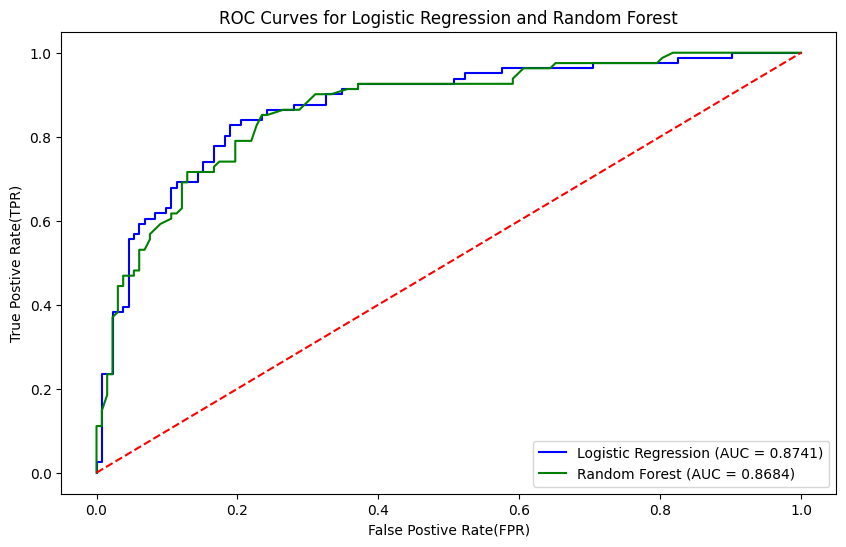

In [108]:
plt.figure(figsize=(10,6))
plt.plot(log_reg_fpr,log_reg_tpr,color = "blue",label=f'Logistic Regression (AUC = {log_reg_auc:.4f})')
plt.plot(rf_fpr,rf_tpr,color="green",label=f'Random Forest (AUC = {rf_auc:.4f})')

# Plot random chance line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.title("ROC Curves for Logistic Regression and Random Forest")
plt.xlabel("False Postive Rate(FPR)")
plt.ylabel("True Postive Rate(TPR)")
plt.legend(loc="lower right")
plt.show()

# evaluate the model using accuracy_score

In [109]:
from sklearn.metrics import accuracy_score


In [110]:
my_accuracy = accuracy_score(y_test,y_pred)
my_accuracy

0.812206572769953

## Train GridSearchCV for Logistic Regression 

In [111]:
from sklearn.model_selection import GridSearchCV

In [117]:
log_reg_param = {
    "penalty":["l1","l2","elasticnet"],
"max_iter":[100,70,50],
"solver":["liblinear","saga"],
"C":[5,6,7]
}

grid_for_Log = GridSearchCV(my_logistic_model,log_reg_param,n_jobs=-1,cv=5)

grid_for_Log.fit(X_train_scaled_df,y_train)


c:\Users\Eng_Tamer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Eng_Tamer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Eng_Tamer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=5, n_jobs=-1, penalty='l1',
                                          random_state=42, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [5, 6, 7], 'max_iter': [100, 70, 50],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']})

In [118]:
grid_for_Log.best_params_

{'C': 5, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [119]:
grid_for_Log.best_score_


np.float64(0.7753659039373326)

In [120]:
y_pred_log_reg_grid = grid_for_Log.predict(X_test_scaled_df)


In [121]:
print(classification_report(y_test,y_pred_log_reg_grid))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       132
           1       0.80      0.68      0.73        81

    accuracy                           0.81       213
   macro avg       0.81      0.79      0.79       213
weighted avg       0.81      0.81      0.81       213



# Use Decision Tree 

In [178]:
from sklearn.tree import DecisionTreeClassifier


In [217]:
my_tree = DecisionTreeClassifier(random_state=42,criterion="entropy",max_depth=300,min_samples_split= 41)
my_tree.fit(X_train_scaled_df,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=300, min_samples_split=41,
                       random_state=42)

In [218]:
y_pred_tree = my_tree.predict(X_test_scaled_df)

In [219]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       132
           1       0.70      0.73      0.72        81

    accuracy                           0.78       213
   macro avg       0.77      0.77      0.77       213
weighted avg       0.78      0.78      0.78       213



# Use Gridsearch with Decision Tree

In [224]:
tree_params={
    "max_depth":[30,29,31],
    "criterion":["gini","entropy","log_loss"],
    "min_samples_split":[40,39,41]
}
grid_for_tree = GridSearchCV(my_tree,tree_params,cv=5,n_jobs=-1)
grid_for_tree.fit(X_train_scaled_df,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=300,
                                              min_samples_split=41,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [30, 29, 31],
                         'min_samples_split': [40, 39, 41]})

In [225]:
grid_for_tree.best_params_

{'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 41}

In [226]:
grid_for_tree.best_score_

np.float64(0.7327767470624613)

In [220]:
y_pred_tree_grid=grid_for_tree.predict(X_test_scaled_df)

In [221]:
print(classification_report(y_test,y_pred_tree_grid))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       132
           1       0.66      0.72      0.69        81

    accuracy                           0.75       213
   macro avg       0.74      0.74      0.74       213
weighted avg       0.76      0.75      0.75       213

